In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
# Setting the working directory
import os
os.chdir('C:\\Users\\aibar\\OneDrive\\Desktop\\Flight_Fare_Prediction-main\\')

In [3]:
from src.data.make_dataset import load_and_save_data_by_folder

path = 'src/data/raw'

# Load and save concatenated data by folder
load_and_save_data_by_folder(path)

In [4]:
import pandas as pd
required_column_names = ['flightDate', 'startingAirport',
                         'destinationAirport', 'totalFare', 'totalTravelDistance',
                         'segmentsDepartureTimeRaw', 'segmentsCabinCode']
df = pd.read_csv("data/interim/ATL/ATL_concatenated.csv", usecols=required_column_names)
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'data/interim/ATL/ATL_concatenated.csv'

In [22]:

df.isna().sum()


flightDate                        0
startingAirport                   0
destinationAirport                0
totalFare                         0
totalTravelDistance          239776
segmentsDepartureTimeRaw          0
segmentsDurationInSeconds         0
segmentsDistance                  0
segmentsCabinCode                 0
dtype: int64

In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
columns_to_explode = [
            'segmentsDepartureTimeRaw', 'segmentsDurationInSeconds',
            'segmentsDistance', 'segmentsCabinCode'
        ]

In [21]:
#df['segmentsDistance'].fillna('None', inplace = True)

In [139]:
# Number of splits for each row across the first column
#splits = df[columns_to_explode[0]].str.split('\|\|').apply(lambda x: len(x) if isinstance(x, list) else 0)
        

In [ ]:
#for col in columns_to_explode[1:]:
            col_splits = df[col].str.split('\|\|').apply(lambda x: len(x) if isinstance(x, list) else 0)
            if not all(col_splits == splits):
                raise ValueError(f"Columns {columns_to_explode[0]} and {col} do not have the same number of '||' splits.")
        

In [4]:
for col in columns_to_explode:
            df[col] = df[col].str.split('\|\|')

In [5]:
for col in columns_to_explode:
            df = df.explode(col)

In [32]:
df_backup = df.copy()

In [68]:
df.head()

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,16500,1723,coach
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,16500,1723,coach
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,16500,672,coach
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,16500,672,coach
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,7620,1723,coach


In [6]:
 # Reset the index to ensure unique indices
df.reset_index(drop=True, inplace=True)
print(f"Number of Data Before dropping duplicates:{len(df)}")
df = df.drop_duplicates()
print(f"Number of Data After dropping duplicates:{len(df)}")


Number of Data Before dropping duplicates:57115495
Number of Data After dropping duplicates:16766010


In [70]:
df.head()

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,16500,1723,coach
2,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,16500,672,coach
4,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,7620,1723,coach
6,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00.000-05:00,7620,672,coach
8,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T15:59:00.000-07:00,16500,1723,coach


In [7]:
if 'segmentsDepartureTimeRaw' in columns_to_explode:
            # Ensure that the exploded values are valid datetime strings
            df['segmentsDepartureTimeRaw'] = df['segmentsDepartureTimeRaw'].str.extract(r'(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2})')[0]


In [72]:
df.head()

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,16500,1723,coach
2,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,16500,672,coach
4,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,7620,1723,coach
6,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,7620,672,coach
8,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T15:59:00,16500,1723,coach


In [8]:
numerical_features = df.select_dtypes(include='number')
numerical_features.columns

Index(['totalFare', 'totalTravelDistance'], dtype='object')

In [9]:
categorical_features = ['startingAirport', 'destinationAirport' , 'segmentsCabinCode']

In [75]:
df[categorical_features].describe()

,startingAirport,destinationAirport,segmentsCabinCode
count,16766010,16766010,16766010
unique,16,16,4
top,LAX,OAK,coach
freq,1549796,1492873,16664924


In [44]:
df.isna().sum()

flightDate                        0
startingAirport                   0
destinationAirport                0
totalFare                         0
totalTravelDistance          584286
segmentsDepartureTimeRaw          0
segmentsDurationInSeconds         0
segmentsDistance                  0
segmentsCabinCode                 0
dtype: int64

In [76]:
df.head()

,flightDate,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDepartureTimeRaw,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,16500,1723,coach
2,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,16500,672,coach
4,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,7620,1723,coach
6,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T11:10:00,7620,672,coach
8,2022-06-17,ORD,OAK,537.6,2395.0,2022-06-17T15:59:00,16500,1723,coach


In [10]:
def get_date_time(df):      
        df['segmentsDepartureTimeRaw'] = pd.to_datetime(df['segmentsDepartureTimeRaw'])
        df['year'] = df['segmentsDepartureTimeRaw'].dt.year
        df['month'] = df['segmentsDepartureTimeRaw'].dt.month
        df['day'] = df['segmentsDepartureTimeRaw'].dt.day
        df['hour'] = df['segmentsDepartureTimeRaw'].dt.hour
        df['minute'] = df['segmentsDepartureTimeRaw'].dt.minute
        df = df.drop(['flightDate', 'segmentsDepartureTimeRaw'], axis=1)
        return df

In [11]:
df = get_date_time(df)

In [97]:
df.head()

,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute
0,ORD,OAK,537.6,2395.0,16500,1723,coach,2022,6,17,11,10
2,ORD,OAK,537.6,2395.0,16500,672,coach,2022,6,17,11,10
4,ORD,OAK,537.6,2395.0,7620,1723,coach,2022,6,17,11,10
6,ORD,OAK,537.6,2395.0,7620,672,coach,2022,6,17,11,10
8,ORD,OAK,537.6,2395.0,16500,1723,coach,2022,6,17,15,59


In [12]:
def downcast( df):
        numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
        df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, downcast='integer', errors='ignore')
        df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, downcast='float', errors='ignore')
        return df

In [13]:
df = downcast(df)

In [14]:
df.isna().sum()

startingAirport                   0
destinationAirport                0
totalFare                         0
totalTravelDistance          584286
segmentsDurationInSeconds         0
segmentsDistance              19141
segmentsCabinCode                 0
year                              0
month                             0
day                               0
hour                              0
minute                            0
dtype: int64

In [101]:
bkp = df.copy()

In [15]:
def imputation_numerical(df):
    # Calculate the mode for each group of ('startingAirport', 'destinationAirport')
    mode_totalTravelDistance = df.groupby(['startingAirport', 'destinationAirport'])['totalTravelDistance'].transform(lambda x: x.mode().max())
    mode_segmentsDistance = df.groupby(['startingAirport', 'destinationAirport'])['segmentsDistance'].transform(lambda x: x.mode().max())

    # Fill missing values in the DataFrame with the calculated modes
    df['totalTravelDistance'] = df['totalTravelDistance'].fillna(mode_totalTravelDistance)
    df['segmentsDistance'] = df['segmentsDistance'].fillna(mode_segmentsDistance)

    return df


In [16]:
df = imputation_numerical(df)

In [17]:
df.head()

,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute
0,ORD,OAK,537.599976,2395.0,16500,1723,coach,2022,6,17,11,10
2,ORD,OAK,537.599976,2395.0,16500,672,coach,2022,6,17,11,10
4,ORD,OAK,537.599976,2395.0,7620,1723,coach,2022,6,17,11,10
6,ORD,OAK,537.599976,2395.0,7620,672,coach,2022,6,17,11,10
8,ORD,OAK,537.599976,2395.0,16500,1723,coach,2022,6,17,15,59


In [18]:
bkp = df.copy()

In [19]:
def map_categorical_features( df):
        airport_code_map = {
            'BOS': 1,'CLT': 2,'DEN': 3,'DFW': 4,'DTW': 5,'EWR': 6,'IAD': 7,'JFK': 8,'LAX': 9,'LGA': 10,
            'MIA': 11,'OAK': 12,'ORD': 13,'PHL': 14,'SFO': 15,'ATL': 16,'unknown': 0
                            }
        cabin_code_map = {
            'coach':1,
            'first':2,
            'premium coach':3,
            'business':4,
            'unknown':0
        }
        df['startingAirport'] = df['startingAirport'].map(airport_code_map)
        df['destinationAirport'] = df['destinationAirport'].map(airport_code_map)
        df['segmentsCabinCode'] = df['segmentsCabinCode'].map(cabin_code_map)
        return df

In [20]:
df = map_categorical_features(df)

In [112]:
df.head()

,startingAirport,destinationAirport,totalFare,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute
0,13,12,537.599976,2395.0,16500,1723,1,2022,6,17,11,10
2,13,12,537.599976,2395.0,16500,672,1,2022,6,17,11,10
4,13,12,537.599976,2395.0,7620,1723,1,2022,6,17,11,10
6,13,12,537.599976,2395.0,7620,672,1,2022,6,17,11,10
8,13,12,537.599976,2395.0,16500,1723,1,2022,6,17,15,59


In [21]:
bkp = df.copy()

In [22]:
df= downcast(df)

In [115]:
bkp = df.copy()

In [23]:
def mode_fare( df):
        mode_fare_list = ['startingAirport', 'destinationAirport','segmentsCabinCode','year','month','day',
                          'hour','minute']
        mode_values = df.groupby(mode_fare_list)['totalFare'].agg(lambda x:x.mode()[0]).reset_index(name="Total_fare_mode")
        df = df.merge(mode_values, on=mode_fare_list,how='inner')
        print(f'Before Duplicates: {len(df)}')
        df = df.drop_duplicates()
        df = df.drop(['totalFare'], axis=1)
        print(f'After Duplicates:{len(df)}')
        return df

In [24]:
df = mode_fare(df)

Before Duplicates: 16766010
After Duplicates:16762922


In [118]:
bkp = df.copy()

In [122]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,startingAirport,destinationAirport,totalTravelDistance,segmentsCabinCode,year,month,day,hour,minute,Total_fare_mode
count,16763026.00,16763026.00,16763026.00,16763026.00,16763026.00,16763026.00,16763026.00,16763026.00,16763026.00,16763026.00
mean,8.83,8.78,1868.58,1.01,2022.00,5.38,15.78,13.26,26.96,426.13
std,4.59,4.59,820.78,0.13,0.00,0.71,8.80,5.25,18.64,221.46
min,1.00,1.00,97.00,1.00,2022.00,4.00,1.00,0.00,0.00,23.97
25%,5.00,5.00,1137.00,1.00,2022.00,5.00,8.00,9.00,10.00,267.60
50%,9.00,9.00,1832.00,1.00,2022.00,5.00,16.00,13.00,29.00,400.09
75%,13.00,12.00,2605.00,1.00,2022.00,6.00,23.00,18.00,43.00,546.60
max,16.00,16.00,4430.00,4.00,2022.00,7.00,31.00,23.00,59.00,4792.60


In [123]:
corr = df.corr()

C:\Users\aibar\AppData\Local\Temp\ipykernel_24208\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [124]:
df.isna().sum()

startingAirport              0
destinationAirport           0
totalTravelDistance          0
segmentsDurationInSeconds    0
segmentsDistance             0
segmentsCabinCode            0
year                         0
month                        0
day                          0
hour                         0
minute                       0
Total_fare_mode              0
dtype: int64

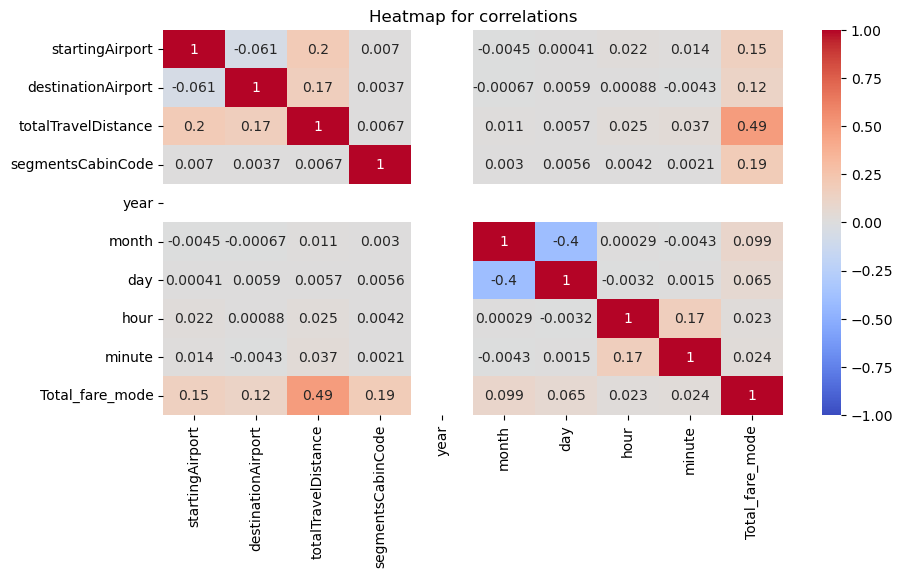

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Heatmap for correlations')

sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')
plt.show()

In [126]:
df.columns

Index(['startingAirport', 'destinationAirport', 'totalTravelDistance',
       'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
       'year', 'month', 'day', 'hour', 'minute', 'Total_fare_mode'],
      dtype='object')

In [127]:
df.head()

,startingAirport,destinationAirport,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute,Total_fare_mode
0,13,12,2395.00,16500,1723,1,2022,6,17,11,10,537.60
1,13,12,2395.00,16500,672,1,2022,6,17,11,10,537.60
2,13,12,2395.00,7620,1723,1,2022,6,17,11,10,537.60
3,13,12,2395.00,7620,672,1,2022,6,17,11,10,537.60
4,13,12,2395.00,16500,1723,1,2022,6,17,11,10,537.60


In [34]:
df.isna().sum()

startingAirport              0
destinationAirport           0
totalTravelDistance          0
segmentsDurationInSeconds    0
segmentsDistance             0
segmentsCabinCode            0
year                         0
month                        0
day                          0
hour                         0
minute                       0
Total_fare_mode              0
dtype: int64

In [28]:
mode_segmentsDistance = df.groupby(['startingAirport', 'destinationAirport'])['segmentsDistance'].transform(lambda x: x.mode().max())

In [31]:
df['segmentsDistance'] = df['segmentsDistance'].mask(df['segmentsDistance'] == 'None', mode_segmentsDistance)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Split the data into training and testing sets
X = df[['startingAirport', 'destinationAirport', 
          'segmentsCabinCode',
        'year', 'month', 'day', 'hour', 'minute']]
y = df['Total_fare_mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and train the Random Forest model for regression
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error (RMSE): {rmse}')


In [25]:

columns_with_none = df.applymap(lambda x: x == 'None').any()

# List the column names with 'None' values
columns_containing_none = columns_with_none[columns_with_none].index.tolist()

print("Columns with 'None' values:", columns_containing_none)


Columns with 'None' values: ['segmentsDistance']


In [32]:
df[df['segmentsDistance']=='None']

,startingAirport,destinationAirport,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute,Total_fare_mode
758,6,5,1050.0,8280,None,1,2022,5,31,9,43,113.779999
759,6,5,1050.0,6900,None,1,2022,5,31,9,43,113.779999
760,6,5,1050.0,8280,None,1,2022,5,31,9,43,113.779999
761,6,5,1050.0,6900,None,1,2022,5,31,9,43,113.779999
762,6,5,1050.0,8280,None,1,2022,5,31,9,43,113.779999
...,...,...,...,...,...,...,...,...,...,...,...,...
16764895,6,13,725.0,11520,None,1,2022,6,29,15,33,574.580017
16765312,14,13,687.0,6240,None,1,2022,6,29,13,50,372.100006
16765313,14,13,687.0,7620,None,1,2022,6,29,13,50,372.100006
16765314,14,13,687.0,6240,None,1,2022,6,29,16,25,372.100006


########################

In [6]:
import pandas as pd
df = pd.read_csv("C:\\Users\\aibar\\Downloads\\preprocessed_data.csv") #the preprocessed data is the data on which data preprocessing has been done and the script fot that is ml_model_data_preprocessor.py
df.head(5)

,startingAirport,destinationAirport,totalTravelDistance,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,year,month,day,hour,minute,Total_fare_mode
0,16,1,947.0,8940.0,947.0,1,2022,4,17,12,57,248.6
1,16,1,947.0,9000.0,947.0,1,2022,4,17,6,30,248.6
2,16,1,947.0,9000.0,947.0,1,2022,4,17,11,35,248.6
3,16,1,947.0,9120.0,947.0,1,2022,4,17,13,59,248.6
4,16,1,947.0,9240.0,947.0,1,2022,4,17,9,59,248.6


In [10]:
df.columns

Index(['startingAirport', 'destinationAirport', 'totalTravelDistance',
       'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode',
       'year', 'month', 'day', 'hour', 'minute', 'Total_fare_mode'],
      dtype='object')

In [11]:
corr = df.corr()

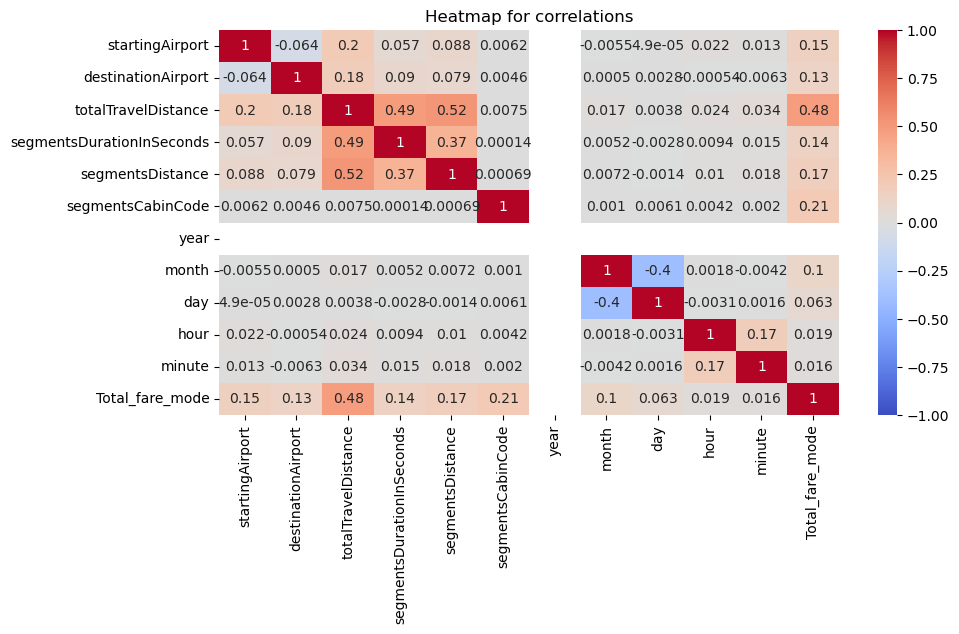

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Heatmap for correlations')

sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df is your DataFrame with the specified columns
X = df[['startingAirport', 'destinationAirport', 'segmentsCabinCode', 'year', 'month', 'day', 'hour', 'minute']]
y = df['Total_fare_mode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model for regression
model = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10, max_features='sqrt', n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error (RMSE): {rmse}')


Root Mean Square Error (RMSE): 183.9401336613372


In [9]:
 import joblib
joblib.dump(model, 'best_model_aibarna_final.pb')

['best_model_aibarna_final.pb']